In [3]:
import numpy as np
import cv2
import PIL.Image as img
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [4]:
img_shape=(224,224)

clasifier=keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4",input_shape=img_shape+(3,))
])

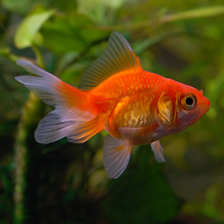

In [5]:
gold_fish=img.open('goldfish.jpg').resize(img_shape)
gold_fish

In [6]:
gold_fish=np.array(gold_fish)
gold_fish.shape

(224, 224, 3)

In [7]:
gold_fish=gold_fish/255
gold_fish.shape

(224, 224, 3)

In [8]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [9]:
result=clasifier.predict(gold_fish[np.newaxis,...])
result

array([[ 0.2210783 ,  2.0497668 ,  9.622809  , ..., -1.4619296 ,
        -0.2823091 , -0.25916258]], dtype=float32)

In [10]:
result.shape

(1, 1001)

In [11]:
predicted_label_index=np.argmax(result)
predicted_label_index

2

In [12]:
img_labels=[]
with open("ImageNetLabels.txt","r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [13]:
image_labels[predicted_label_index]

'goldfish'

Load Flowers Dataset

In [14]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=keras.utils.get_file('flower_photos',origin=dataset_url,cache_dir='.',untar=True)

In [15]:
data_dir

'.\\datasets\\flower_photos'

In [16]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

WindowsPath('datasets/flower_photos')

In [17]:
list(data_dir.glob('*/*.jpg'))[:5]

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [18]:
img_count=len(list(data_dir.glob('*/*.jpg')))
img_count

3670

In [19]:
roses=list(data_dir.glob('roses/*'))
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

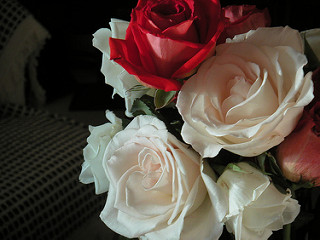

In [20]:
img.open(roses[1])

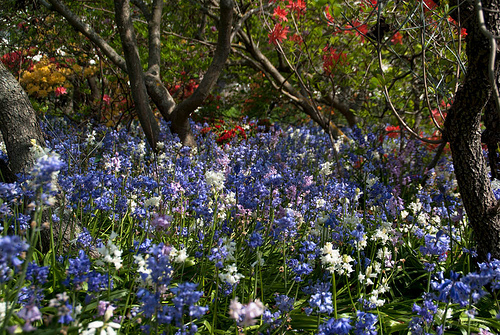

In [21]:
tulips=list(data_dir.glob('tulips/*'))
img.open(tulips[1])

Read flowers images from disk into numpy array using opencv

In [22]:
flowers_img_dict={
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [23]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [24]:
flowers_img_dict['roses'][:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

In [25]:
str(flowers_img_dict['roses'][0])

'datasets\\flower_photos\\roses\\10090824183_d02c613f10_m.jpg'

In [26]:
image=cv2.imread(str(flowers_img_dict['roses'][0]))

In [27]:
image.shape

(240, 179, 3)

In [28]:
cv2.resize(image,(224,224)).shape

(224, 224, 3)

In [30]:
X,y=[],[]
for flower_name, images in flowers_img_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [31]:
X=np.array(X)
y=np.array(y)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=90)

In [33]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [34]:
X[0].shape

(224, 224, 3)

In [35]:
img_shape+(3,)

(224, 224, 3)

In [37]:
x0_resized = cv2.resize(X[0], img_shape)
x1_resized = cv2.resize(X[1], img_shape)
x2_resized = cv2.resize(X[2], img_shape)

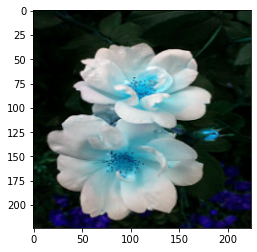

In [38]:
plt.imshow(X[0])

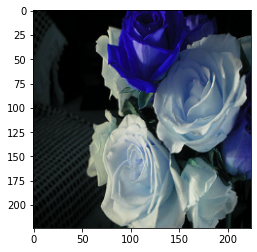

In [39]:
plt.imshow(X[1])

In [40]:
predicted=clasifier.predict(np.array([x0_resized,x1_resized,x2_resized]))
predicted = np.argmax(predicted,axis=1)
predicted

array([795, 880, 795], dtype=int64)

In [41]:
image_labels[795]

'shower curtain'

In [42]:
image_labels[880]

'umbrella'

<h3 style='color:purple'>Now take pre-trained model and retrain it using flowers images</h3>

In [43]:
feature_extractor_model="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
predtrained_model=hub.KerasLayer(
    feature_extractor_model,input_shape=(224,224,3),trainable=False
)

In [44]:
model=keras.Sequential([
    predtrained_model,
    keras.layers.Dense(5)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [48]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 102s 960ms/step - loss: 0.7892 - acc: 0.7100
Epoch 2/5
86/86 [==============================] - 76s 883ms/step - loss: 0.4203 - acc: 0.8496
Epoch 3/5
86/86 [==============================] - 69s 808ms/step - loss: 0.3290 - acc: 0.8924
Epoch 4/5
86/86 [==============================] - 70s 809ms/step - loss: 0.2767 - acc: 0.9179
Epoch 5/5
86/86 [==============================] - 68s 796ms/step - loss: 0.2374 - acc: 0.9331


In [49]:
model.evaluate(X_test_scaled,y_test)

29/29 [==============================] - 56s 751ms/step - loss: 0.3725 - acc: 0.8715


[0.37253260612487793, 0.8714597225189209]